In [30]:
% pylab inline
import os
import random

import pandas as pd
from scipy.misc import imread

Populating the interactive namespace from numpy and matplotlib


C:\tools\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['imread', 'test', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


4844
Age:  OLD


C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  # Remove the CWD from sys.path while we load stuff.


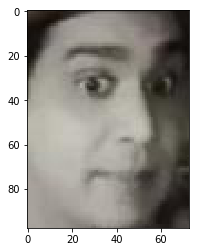

In [31]:
root_dir = os.path.abspath('.')
data_dir = 'C:\\Users\\User\\Age-Detection-Problem\\Dataset'

train = pd.read_csv(os.path.join(data_dir, 'Train\\train.csv'))
test = pd.read_csv(os.path.join(data_dir, 'Test\\test.csv'))

i = random.choice(train.index)
print(i)
img_name = train.ID[i]
img = imread(os.path.join(data_dir, 'Train\\Train\\', img_name))

print('Age: ', train.Class[i])

imshow(img)

In [33]:
from scipy.misc import imresize

temp = []
for img_name in train.ID:
    img_path = os.path.join(data_dir, 'Train\\Train\\', img_name)
    img = imread(img_path)
    img = imresize(img, (32, 32))
    img = img.astype('float32') # this will help us in later stage
    temp.append(img)

train_x = np.stack(temp)

C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  import sys


In [36]:
temp = []
for img_name in test.ID:
    img_path = os.path.join(data_dir, 'Test\\Test\\', img_name)
    img = imread(img_path)
    img = imresize(img, (32, 32))
    temp.append(img.astype('float32'))

test_x = np.stack(temp)

C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.
C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """


In [37]:
train_x = train_x / 255.
test_x = test_x / 255.

In [38]:
train.Class.value_counts(normalize=True)

MIDDLE    0.542751
YOUNG     0.336883
OLD       0.120366
Name: Class, dtype: float64

In [41]:
test['Class'] = 'MIDDLE'
test.to_csv("sub01.csv", index=False)

In [42]:
import keras
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
train_y = lb.fit_transform(train.Class)
train_y = keras.utils.np_utils.to_categorical(train_y)

C:\tools\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [76]:
input_num_units = (32, 32, 3)
hidden_num_units = 500
output_num_units = 3

epochs = 20
batch_size = 128

In [77]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, InputLayer

In [78]:
model = Sequential([
  InputLayer(input_shape=input_num_units),
  Flatten(),
  Dense(units=hidden_num_units, activation='relu'),
  Dense(units=output_num_units, activation='softmax'),
])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 500)               1536500   
_________________________________________________________________
dense_10 (Dense)             (None, 3)                 1503      
Total params: 1,538,003
Trainable params: 1,538,003
Non-trainable params: 0
_________________________________________________________________


In [79]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
# model.fit(train_x, train_y, batch_size=batch_size,epochs=epochs,verbose=1)

Epoch 1/20
19906/19906 [==============================] - 7s 338us/step - loss: 0.8966 - acc: 0.5752
Epoch 2/20
19906/19906 [==============================] - 6s 300us/step - loss: 0.8520 - acc: 0.5994
Epoch 3/20
19906/19906 [==============================] - 6s 281us/step - loss: 0.8267 - acc: 0.6169
Epoch 4/20
19906/19906 [==============================] - 5s 276us/step - loss: 0.8191 - acc: 0.6191
Epoch 5/20
19906/19906 [==============================] - 6s 313us/step - loss: 0.8111 - acc: 0.6270
Epoch 6/20
19906/19906 [==============================] - 6s 299us/step - loss: 0.8018 - acc: 0.6316
Epoch 7/20
19906/19906 [==============================] - 6s 307us/step - loss: 0.7949 - acc: 0.6359
Epoch 8/20
19906/19906 [==============================] - 6s 295us/step - loss: 0.7872 - acc: 0.6436
Epoch 9/20
19906/19906 [==============================] - 6s 290us/step - loss: 0.7826 - acc: 0.6429
Epoch 10/20
19906/19906 [==============================] - 6s 311us/step - loss: 0.7771 - a

In [80]:
model.fit(train_x, train_y, batch_size=batch_size,epochs=epochs,verbose=1, validation_split=0.2)

Train on 15924 samples, validate on 3982 samples
Epoch 1/20
15924/15924 [==============================] - 6s 350us/step - loss: 0.7379 - acc: 0.6743 - val_loss: 0.7573 - val_acc: 0.6733
Epoch 2/20
15924/15924 [==============================] - 5s 327us/step - loss: 0.7393 - acc: 0.6696 - val_loss: 0.7251 - val_acc: 0.6743
Epoch 3/20
15924/15924 [==============================] - 5s 335us/step - loss: 0.7353 - acc: 0.6729 - val_loss: 0.7183 - val_acc: 0.6821
Epoch 4/20
15924/15924 [==============================] - 6s 346us/step - loss: 0.7293 - acc: 0.6775 - val_loss: 0.7361 - val_acc: 0.6723
Epoch 5/20
15924/15924 [==============================] - 5s 310us/step - loss: 0.7287 - acc: 0.6759 - val_loss: 0.7173 - val_acc: 0.6846
Epoch 6/20
15924/15924 [==============================] - 5s 312us/step - loss: 0.7257 - acc: 0.6826 - val_loss: 0.7138 - val_acc: 0.6981
Epoch 7/20
15924/15924 [==============================] - 5s 329us/step - loss: 0.7212 - acc: 0.6831 - val_loss: 0.7192 - v

In [81]:
pred = model.predict_classes(test_x)
pred = lb.inverse_transform(pred)

test['Class'] = pred
test.to_csv("sub02.csv", index=False)

C:\tools\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [82]:
test.Class.value_counts(normalize=True)

MIDDLE    0.820072
YOUNG     0.162598
OLD       0.017330
Name: Class, dtype: float64

C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  after removing the cwd from sys.path.
C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """


Original: MIDDLE Predicted: YOUNG


C:\tools\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


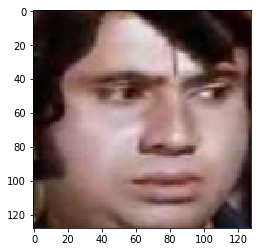

In [86]:
i = random.choice(train.index)
img_name = train.ID[i]

img = imread(os.path.join(data_dir, 'Train\\Train\\', img_name)).astype('float32')
imshow(imresize(img, (128, 128)))
pred = model.predict_classes(train_x)
print('Original:', train.Class[i], 'Predicted:', lb.inverse_transform(pred[i]))